In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# import plotly.offline as pyoff
# import chart_studio.plotly as py
# import plotly.graph_objects as go

#import chart_studio
#chart_studio.tools.set_credentials_file(username='abdeleatifi', api_key='5DuEBwbJe5DrnqoWw4l0')

In [2]:
# Define the path to your CSV file
csv_file_path = r'data_preperation/data/usda_wheat_planted_harvested_yield_soild_weatherd_priced_2014_2022.csv'

# Load the CSV file into a dataframe
df = pd.read_csv(csv_file_path)
df.head(2)

,Year,Planting_Dates,Harvesting_Dates,State,State_ANSI,Ag_District,Ag_District_Code,County,County_ANSI,Commodity,ACRES_PLANTED,ACRES_HARVESTED,YIELD_(BU/ACRE),soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close
0,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,ARKANSAS,1,WHEAT,16300,15300,73.2,22.0,0.4,1530.0,Silt loam,1746.3,0.0,286.2,5.8908,5.97,7.39,4.74,5.895
1,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CRITTENDEN,35,WHEAT,40800,37000,65.7,28.0,0.4,1590.0,Clay loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895


In [3]:
# Rename our columns
df = df.rename(columns={'Year' : 'year',
                        'Planting_Dates' : 'planting_date',
                        'Harvesting_Dates' : 'harvesting_date',
                        'State' : 'state',
                        'State_ANSI' : 'state_ansi',
                        'Ag_District' : 'ag_district',
                        'Ag_District_Code' : 'ag_district_code',
                        'County' : 'county',
                        'County_ANSI' : 'county_ansi',
                        'Commodity' : 'commodity',
                        'ACRES_PLANTED' : 'acres_planted', 
                        'ACRES_HARVESTED' : 'acres_harvested',
                        'YIELD_(BU/ACRE)' : 'yield'
                        })

In [4]:
df['production'] = (df['yield'] * df['acres_harvested']) * 27.216 # in Kg

# Calculate a new column 'Loss_perc' based on columns 'Acres_Planted' and 'Acres_Harvested'
df['loss_perc'] = ((df['acres_planted'] - df['acres_harvested']) / df['acres_planted']).apply(lambda x: round(x, 2))

df['crop_health'] = 1 - df['loss_perc'] # in %

df['land_use'] = (df['acres_planted'] / 2.471).apply(lambda x: round(x, 2))  # in Hectares

df['harvesting_long_date'] = pd.to_datetime(df['harvesting_date'] + '-' + df['year'].astype(str), format='%d-%b-%Y')
df['planting_long_date'] = pd.to_datetime(df['planting_date'] + '-' + str(df['year'][0] - 1), format='%d-%b-%Y')

df.head(3)

,year,planting_date,harvesting_date,state,state_ansi,ag_district,ag_district_code,county,county_ansi,commodity,acres_planted,acres_harvested,yield,soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close,production,loss_perc,crop_health,land_use,harvesting_long_date,planting_long_date
0,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,ARKANSAS,1,WHEAT,16300,15300,73.2,22.0,0.4,1530.0,Silt loam,1746.3,0.0,286.2,5.8908,5.97,7.39,4.74,5.895,30480831.36,0.06,0.94,6596.52,2014-07-02,2013-10-03
1,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CRITTENDEN,35,WHEAT,40800,37000,65.7,28.0,0.4,1590.0,Clay loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895,66159374.40,0.09,0.91,16511.53,2014-07-02,2013-10-03
2,2014,03-Oct,02-Jul,ARKANSAS,5,EAST CENTRAL,60,CROSS,37,WHEAT,16600,15400,64.8,24.0,0.4,1570.0,Silt loam,2163.6,0.0,368.9,5.8908,5.97,7.39,4.74,5.895,27159390.72,0.07,0.93,6717.93,2014-07-02,2013-10-03


In [5]:
# then let's load the csv file that contains daily (almost daily) prices from 2000 to 2023

csv_file_path = r'data_preperation/data/wheat-prices-historical-chart-data.csv'

df_price = pd.read_csv(csv_file_path)
df_price['date'] = pd.to_datetime(df_price['date'], format='%d/%m/%y')

# By merging the two DFs we will have df_merged has a column named value containing wheat the closest price to the havest date

# Sort the 'harvesting_long_date' column in ascending order
df.sort_values('harvesting_long_date', inplace=True)

# Merge the dataframes based on the closest date
df = pd.merge_asof(df, df_price, left_on='harvesting_long_date', right_on='date', direction='nearest')

# Drop unnecessary columns if needed
df.drop(['date'], axis=1, inplace=True)

df['yearly_income'] = df['production'] * df['value'] # in dollars $

df.head(2)

,year,planting_date,harvesting_date,state,state_ansi,ag_district,ag_district_code,county,county_ansi,commodity,acres_planted,acres_harvested,yield,soil_water,soil_carbon,soil_density,soil_type,gdd,ehdd,ecdd,average_price,year_open,year_high,year_low,year_close,production,loss_perc,crop_health,land_use,harvesting_long_date,planting_long_date,value,yearly_income
0,2014,12-Oct,27-Jun,GEORGIA,13,SOUTH CENTRAL,80,COLQUITT,71,WHEAT,3500,1800,41.7,18.0,0.4,1550.0,Sandy loam,2113.9,0.0,24.0,5.8908,5.97,7.39,4.74,5.895,2042832.96,0.49,0.51,1416.43,2014-06-27,2013-10-12,5.9035,1.205986e+07
1,2014,12-Oct,27-Jun,GEORGIA,13,SOUTH CENTRAL,80,BROOKS,27,WHEAT,5100,3300,46.4,18.0,0.4,1520.0,Sandy loam,3282.5,0.8,19.9,5.8908,5.97,7.39,4.74,5.895,4167313.92,0.35,0.65,2063.94,2014-06-27,2013-10-12,5.9035,2.460174e+07


In [6]:
# Clean the DataFrame

df = df[['year', 
        'harvesting_long_date', 'planting_long_date', #'planting_date', 'harvesting_date', 
        'state', 'state_ansi',
       #'ag_district', 'ag_district_code', 
        'county', 'county_ansi', #'commodity',
        'acres_planted', 'acres_harvested', #'yield', 
        'soil_water',
        'soil_carbon', 'soil_density', 'soil_type', 
        'gdd', 'ehdd', 'ecdd',
       #'average_price', 'year_open', 'year_high', 'year_low', 'year_close',
        'production', #'loss_perc',
        'crop_health', 'land_use', #'value', 
        'yearly_income'
       ]].copy()

### Dropping missing values

In [7]:
df = df.dropna().reset_index(drop=True)

print(df.shape)

(8257, 20)


# ------------------------------------------------------------------------

# Farms Clustering

## Feature engineering on our data

In [5]:
df_farm = df.groupby(['state', 'county']).size().reset_index()
df_farm.columns = ['state', 'county', 'count']

df_farm = df_farm[['state', 'county']]

In [8]:
df_farm = df[['year', 'state', 'county']]

### Environment Index

In [9]:
soil_type_order = {'Sand' : 1,
             'Loamy sand' : 2,
             'Silt' : 3,
             'Sandy loam' : 4,
             'Silt loam' : 5,
             'Loam' : 6,
             'Sandy clay loam' : 7,
             'Silty clay loam' : 8,
             'Clay loam' : 9,
             'Sandy clay' : 10,
             'Silty clay' : 11,
             'Clay' : 12}

df['soil_type_index'] = [soil_type_order[df['soil_type'][i]] for i in range(df.shape[0])]

In [ ]:
df_env = df[[#'year', 'planting_date', 'harvesting_date', 'state', 'state_ansi',
            #'ag_district', 'ag_district_code', 'county', 'county_ansi', 'commodity',
            #'acres_planted', 'acres_harvested', 'yield', 
            'soil_water',
            'soil_carbon', 'soil_density', #'soil_type_index',# 'soil_type', 
            'gdd', 'ehdd', 'ecdd',
            #'average_price', 'year_open', 'year_high', 'year_low', 'year_close',
            #'harvesting_long_date', 'planting_long_date', 
            #'production', #'loss_perc',
            #'crop_health', 'land_use', #'value', 
            #'yearly_income'
            ]].copy()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_env_nor = scaler.fit_transform(df_env)

df_farm['env_index'] = sum(df_env_nor[:,i] for i in range(df_env_nor.shape[1])) / df_env_nor.shape[1]

In [12]:
# Group the data by county and state
#df_farm['env_index'] = df.groupby(['state', 'county'])['env_index'].mean().reset_index()['env_index']
print(df_farm.head(5))
print()
print(df_farm.env_index.describe())

   year    state    county  env_index
0  2014  GEORGIA  COLQUITT   0.250471
1  2014  GEORGIA    BROOKS   0.277538
2  2014  GEORGIA   MADISON   0.188201
3  2014  GEORGIA      HART   0.203627
4  2014  GEORGIA  FRANKLIN   0.223565

count    8257.000000
mean        0.302359
std         0.062581
min         0.123050
25%         0.259204
50%         0.311708
75%         0.344954
max         0.517723
Name: env_index, dtype: float64


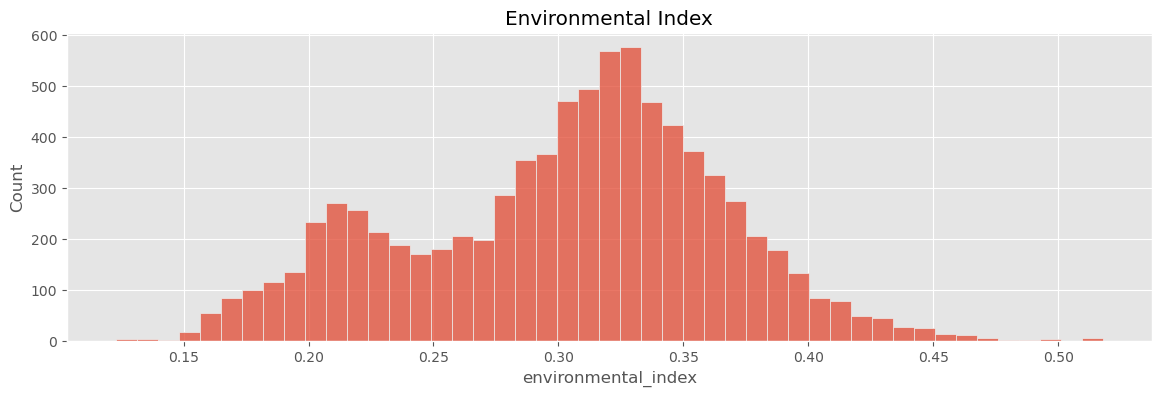

In [18]:
plt.figure(figsize=(14, 4))

sns.histplot(df_farm['env_index'])

plt.xlabel('environmental_index')
plt.title('Environmental Index')
plt.show()


In [ ]:
#plot a recency histogram

plot_data = [
    go.Histogram(
        x=df_farm['env_index']
    )
]

plot_layout = go.Layout(
        title='environmental_index'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_108\1836146069.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  env_index["clusters"] = kmeans.labels_
c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_108\1836146069.py:7: SettingWithCopyWarning: 
A value is trying to

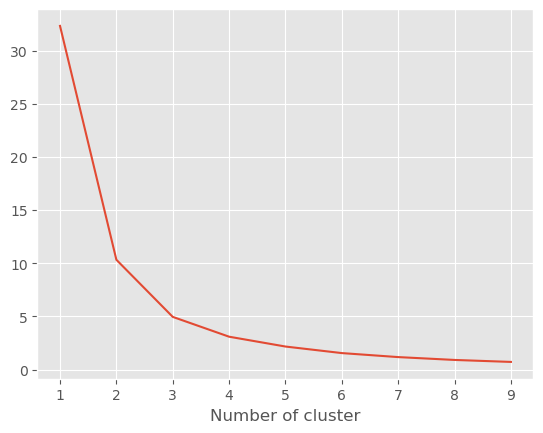

In [19]:
from sklearn.cluster import KMeans

sse={}
env_index = df_farm[['env_index']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_farm[['env_index']])
    env_index["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [20]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_farm[['env_index']])
df_farm['EnvironmentCluster'] = kmeans.predict(df_farm[['env_index']])

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_farm = order_cluster('EnvironmentCluster', 'env_index',df_farm,True)
df_farm.groupby('EnvironmentCluster')['env_index'].describe()

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_108\2599095407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_farm['EnvironmentCluster'] = kmeans.predict(df_farm[['env_index']])


,count,mean,std,min,25%,50%,75%,max
EnvironmentCluster,,,,,,,,
0,1599.0,0.205081,0.021187,0.123050,0.191747,0.208414,0.221483,0.236808
1,1493.0,0.268674,0.015899,0.236928,0.255206,0.270775,0.283000,0.291556
2,2497.0,0.314501,0.011794,0.291572,0.304685,0.315277,0.324710,0.334095
3,1942.0,0.353990,0.012858,0.334129,0.342732,0.352940,0.364748,0.379791
4,726.0,0.406009,0.023512,0.379806,0.388179,0.398951,0.416941,0.517723


### Management Index <=> Crop(s) Health

In [22]:
# Group the data by county and state
df_farm['man_index'] = df['crop_health']
#df_farm['man_index'] = df.groupby(['state', 'county'])['crop_health'].mean().reset_index()['crop_health']
print(df_farm.head(5))
print()
print(df_farm.man_index.describe())

   year    state     county  env_index  EnvironmentCluster  man_index
0  2014  GEORGIA   COLQUITT   0.250471                   1       0.51
1  2014  GEORGIA     BROOKS   0.277538                   1       0.65
2  2014  GEORGIA    BULLOCH   0.239596                   1       0.77
3  2014  GEORGIA  WILKINSON   0.280191                   1       0.75
4  2014  GEORGIA     PUTNAM   0.259976                   1       0.58

count    8257.000000
mean        0.786499
std         0.213008
min         0.000000
25%         0.690000
50%         0.870000
75%         0.940000
max         1.000000
Name: man_index, dtype: float64


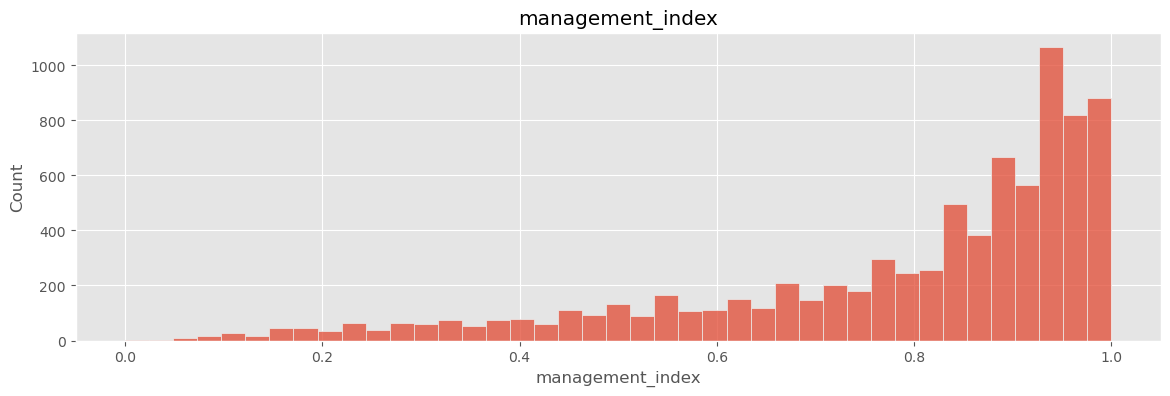

In [23]:
plt.figure(figsize=(14, 4))

sns.histplot(df_farm['man_index'])

plt.xlabel('management_index')
plt.title('management_index')
plt.show()

In [ ]:
#plot a recency histogram

plot_data = [
    go.Histogram(
        x=df_farm['man_index']
    )
]
plot_layout = go.Layout(
        title='management_index (Health)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_108\148393177.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_index["clusters"] = kmeans.labels_
c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_108\148393177.py:7: SettingWithCopyWarning: 
A value is trying to b

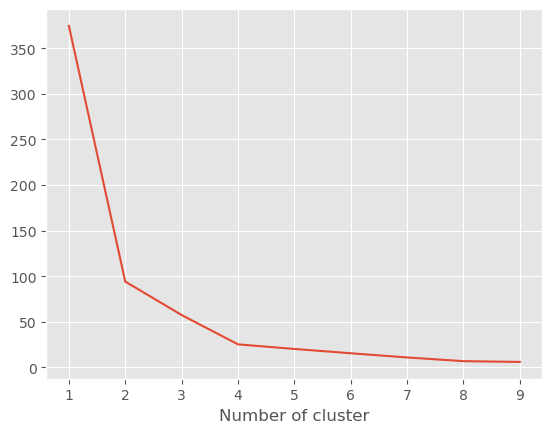

In [24]:
from sklearn.cluster import KMeans

sse={}
man_index = df_farm[['man_index']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(man_index)
    man_index["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_farm[['man_index']])
df_farm['ManagementCluster'] = kmeans.predict(df_farm[['man_index']])

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_farm = order_cluster('ManagementCluster', 'man_index',df_farm,True)
df_farm.groupby('ManagementCluster')['man_index'].describe()

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
ManagementCluster,,,,,,,,
0,703.0,0.274538,0.096227,0.00,0.20,0.29,0.36,0.41
1,1195.0,0.551816,0.069933,0.42,0.49,0.56,0.61,0.66
2,2179.0,0.784635,0.057561,0.67,0.74,0.79,0.83,0.86
3,4180.0,0.940665,0.036637,0.87,0.91,0.94,0.97,1.00


### Income Index <=> yearly_income

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_farm['inc_index'] = scaler.fit_transform(df['yearly_income'].values.reshape(-1, 1))

#df_farm['inc_index'] = df.groupby(['state', 'county'])['yearly_income'].mean().reset_index()['yearly_income']
print(df_farm.head(5))
print()
print(df_farm.inc_index.describe())

   year           state    county  env_index  EnvironmentCluster  man_index  \
0  2014         GEORGIA  COLQUITT   0.250471                   1       0.51   
1  2014         GEORGIA    BROOKS   0.277538                   1       0.65   
2  2014         GEORGIA    PUTNAM   0.259976                   1       0.58   
3  2014     MISSISSIPPI     HINDS   0.276616                   1       0.58   
4  2014  SOUTH CAROLINA  RICHLAND   0.276268                   1       0.55   

   ManagementCluster  inc_index  
0                  1   0.001512  
1                  1   0.003135  
2                  1   0.000950  
3                  1   0.001054  
4                  1   0.000637  

count    8257.000000
mean        0.022397
std         0.043809
min         0.000000
25%         0.002425
50%         0.006805
75%         0.021482
max         1.000000
Name: inc_index, dtype: float64


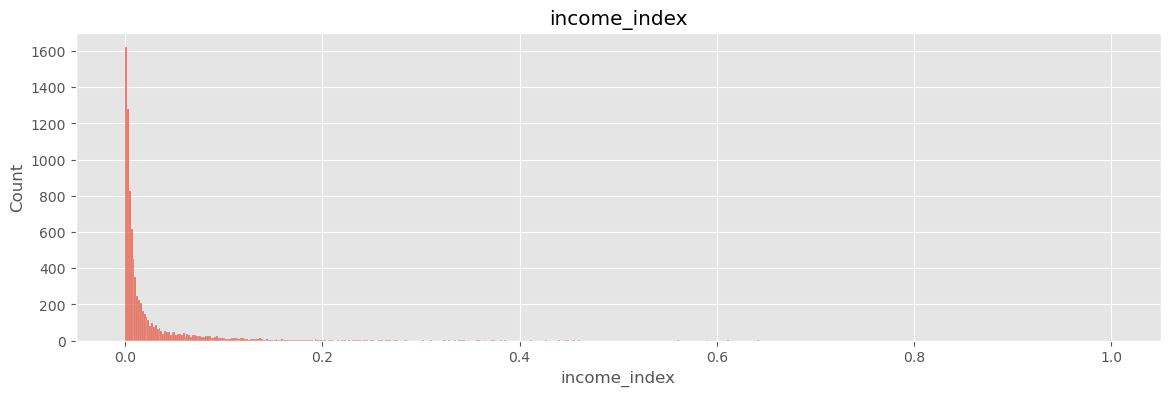

In [27]:
plt.figure(figsize=(14, 4))

sns.histplot(df_farm['inc_index'])

plt.xlabel('income_index')
plt.title('income_index')
plt.show()

In [ ]:
plot_data = [
    go.Histogram(
        x=df_farm['inc_index']
    )
]
plot_layout = go.Layout(
        title='income_index in dollars'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\abdel\AppData\Local\Temp\ipykernel_108\3358090397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_index["clusters"] = kmeans.labels_
c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_108\3358090397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc

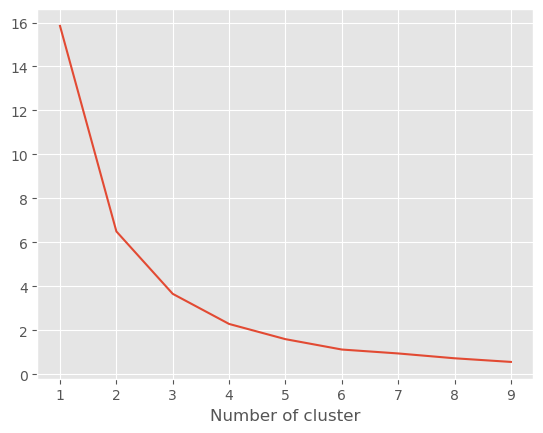

In [28]:
from sklearn.cluster import KMeans

sse={}
inc_index = df_farm[['inc_index']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(inc_index)
    inc_index["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [29]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_farm[['inc_index']])
df_farm['IncomeCluster'] = kmeans.predict(df_farm[['inc_index']])

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_farm = order_cluster('IncomeCluster', 'inc_index',df_farm,True)
df_farm.groupby('IncomeCluster')['inc_index'].describe()

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
IncomeCluster,,,,,,,,
0,6406.0,0.006525,0.006058,0.000000,0.001860,0.004406,0.009430,0.024930
1,1143.0,0.043295,0.013444,0.024959,0.031241,0.040905,0.054268,0.071336
2,537.0,0.099435,0.020161,0.071485,0.082370,0.094952,0.114846,0.143988
3,136.0,0.191195,0.036227,0.145724,0.159379,0.183889,0.220643,0.275348
4,30.0,0.361576,0.053916,0.283290,0.326396,0.357309,0.383772,0.460745
5,5.0,0.680802,0.180798,0.560788,0.591177,0.611410,0.640635,1.000000


### Assets Index <=> Land Use and ownership (for now ...)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_farm['ass_index'] = scaler.fit_transform(df['land_use'].values.reshape(-1, 1))
#df_farm['ass_index'] = df.groupby(['state', 'county'])['land_use'].mean().reset_index()['land_use']
print(df_farm.head(5))
print()
print(df_farm.ass_index.describe())

   year           state    county  env_index  EnvironmentCluster  man_index  \
0  2014         GEORGIA  COLQUITT   0.250471                   1       0.51   
1  2014         GEORGIA    BROOKS   0.277538                   1       0.65   
2  2014         GEORGIA    PUTNAM   0.259976                   1       0.58   
3  2014     MISSISSIPPI     HINDS   0.276616                   1       0.58   
4  2014  SOUTH CAROLINA  RICHLAND   0.276268                   1       0.55   

   ManagementCluster  inc_index  IncomeCluster  ass_index  
0                  1   0.001512              0   0.007927  
1                  1   0.003135              0   0.011770  
2                  1   0.000950              0   0.002642  
3                  1   0.001054              0   0.002402  
4                  1   0.000637              0   0.002402  

count    8257.000000
mean        0.070284
std         0.123291
min         0.000000
25%         0.006966
50%         0.018016
75%         0.064377
max         1.000

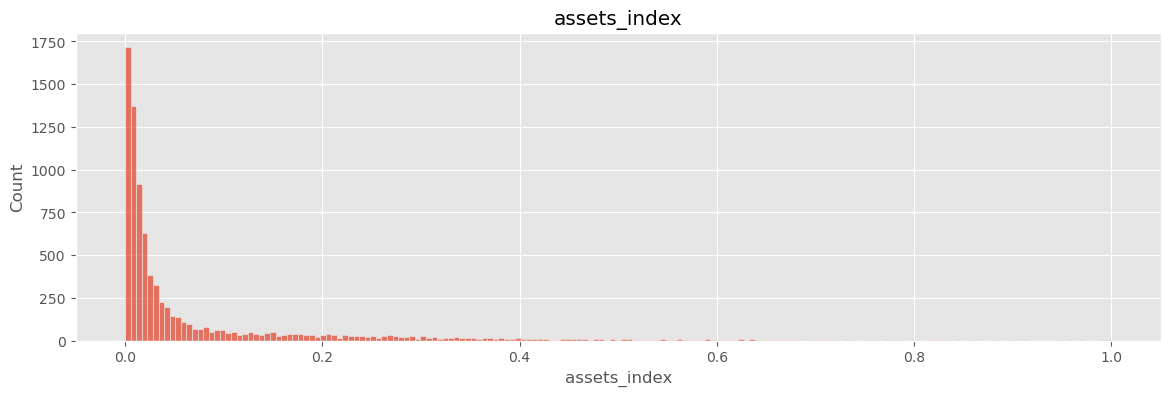

In [31]:
plt.figure(figsize=(14, 4))

sns.histplot(df_farm['ass_index'])

plt.xlabel('assets_index')
plt.title('assets_index')
plt.show()

In [ ]:
plot_data = [
    go.Histogram(
        x=df_farm['ass_index']
    )
]
plot_layout = go.Layout(
        title='assets_index in Heactares'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_108\665475878.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ass_index["clusters"] = kmeans.labels_
c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\abdel\AppData\Local\Temp\ipykernel_108\665475878.py:7: SettingWithCopyWarning: 
A value is trying to b

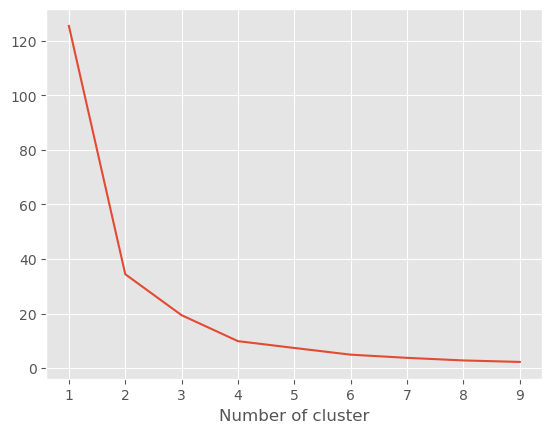

In [32]:
from sklearn.cluster import KMeans

sse={}
ass_index = df_farm[['ass_index']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(ass_index)
    ass_index["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_farm[['ass_index']])
df_farm['AssetsCluster'] = kmeans.predict(df_farm[['ass_index']])

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_farm = order_cluster('AssetsCluster', 'ass_index',df_farm,True)
df_farm.groupby('AssetsCluster')['ass_index'].describe()

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
AssetsCluster,,,,,,,,
0,6495.0,0.019143,0.019099,0.000000,0.005285,0.012251,0.025943,0.087437
1,1025.0,0.156191,0.045385,0.087677,0.115782,0.150853,0.192890,0.246937
2,582.0,0.338939,0.066647,0.247898,0.280567,0.328009,0.387161,0.484747
3,155.0,0.636390,0.119724,0.491953,0.547081,0.604852,0.688326,1.000000


### Overall Index (Clustring)

In [34]:
df_farm['OverallScore'] = df_farm['EnvironmentCluster'] + df_farm['ManagementCluster'] + df_farm['IncomeCluster'] + df_farm['AssetsCluster']

In [35]:
df_farm

,year,state,county,env_index,EnvironmentCluster,man_index,ManagementCluster,inc_index,IncomeCluster,ass_index,AssetsCluster,OverallScore
0,2014,GEORGIA,COLQUITT,0.250471,1,0.51,1,0.001512,0,0.007927,0,2
1,2014,GEORGIA,BROOKS,0.277538,1,0.65,1,0.003135,0,0.011770,0,2
2,2014,GEORGIA,PUTNAM,0.259976,1,0.58,1,0.000950,0,0.002642,0,2
3,2014,MISSISSIPPI,HINDS,0.276616,1,0.58,1,0.001054,0,0.002402,0,2
4,2014,SOUTH CAROLINA,RICHLAND,0.276268,1,0.55,1,0.000637,0,0.002402,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8252,2021,KANSAS,REPUBLIC,0.351266,3,0.53,1,0.325683,4,0.279366,2,10
8253,2014,KANSAS,GEARY,0.390667,4,0.62,1,0.439496,4,0.263752,2,11
8254,2017,OKLAHOMA,WOODS,0.299359,2,0.80,2,0.343226,4,0.428297,2,10
8255,2020,VIRGINIA,ORANGE,0.288824,1,0.97,3,0.425656,4,0.290175,2,10


In [36]:
df_farm.groupby('OverallScore')['env_index','man_index','inc_index','ass_index'].mean()

C:\Users\abdel\AppData\Local\Temp\ipykernel_108\4128557134.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_farm.groupby('OverallScore')['env_index','man_index','inc_index','ass_index'].mean()


,env_index,man_index,inc_index,ass_index
OverallScore,,,,
0,0.209092,0.268936,0.007692,0.013886
1,0.232855,0.426207,0.007942,0.020248
2,0.259122,0.518788,0.010164,0.027298
3,0.249945,0.752863,0.010270,0.032437
4,0.285508,0.780405,0.014460,0.046236
5,0.314132,0.841243,0.017346,0.058573
6,0.339943,0.869162,0.022789,0.081636
7,0.350191,0.865365,0.043734,0.148033
8,0.371515,0.877573,0.057556,0.187295


In [37]:
df_farm.groupby('OverallScore')['env_index'].count()

OverallScore
0       47
1      203
2      594
3     1376
4     1704
5     1762
6     1313
7      643
8      412
9      142
10      42
11      13
12       5
13       1
Name: env_index, dtype: int64

In [110]:
df_farm['Class'] = 'Risky'
df_farm.loc[df_farm['OverallScore'] > 2,'Class'] = 'Average'
df_farm.loc[df_farm['OverallScore'] > 5,'Class'] = 'Good'  
df_farm.loc[df_farm['OverallScore'] > 7,'Class'] = 'Excellent' 

In [57]:
df_farm

,year,state,county,env_index,EnvironmentCluster,man_index,ManagementCluster,inc_index,IncomeCluster,ass_index,AssetsCluster,OverallScore,Class
0,2014,GEORGIA,COLQUITT,0.250471,0,0.51,1,1.205986e+07,0,1416.43,0,0,Risky
1,2014,GEORGIA,PUTNAM,0.259976,0,0.65,1,2.460174e+07,0,2063.94,0,0,Risky
2,2014,GEORGIA,LAMAR,0.256313,0,0.58,1,7.712143e+06,0,526.10,0,0,Risky
3,2014,VIRGINIA,SHENANDOAH,0.248469,0,0.58,1,8.517098e+06,0,485.63,0,0,Risky
4,2014,MISSOURI,NODAWAY,0.255658,0,0.55,1,5.297279e+06,0,485.63,0,0,Risky
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,2019,KANSAS,NEOSHO,0.368248,2,0.14,0,1.453255e+09,3,47146.90,2,7,Excellent
8253,2019,KANSAS,NEMAHA,0.368031,2,0.20,0,1.627707e+09,3,44516.39,2,7,Excellent
8254,2019,MISSOURI,SCOTLAND,0.365667,2,0.32,0,1.568865e+09,3,72237.96,2,7,Excellent
8255,2018,MICHIGAN,MASON,0.399970,2,0.62,1,3.396780e+09,4,48968.03,2,8,Excellent


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

tx_graph = df_farm

plt.figure(figsize=(8, 6))

sns.scatterplot(
    x=tx_graph.query("Class == 'Risky'")['env_index'],
    y=tx_graph.query("Class == 'Risky'")['inc_index'],
    color='red',
    alpha=0.5,
    label='Risky',
    edgecolor='black',
    linewidth=1,
    s=70
)

sns.scatterplot(
    x=tx_graph.query("Class == 'Excellent'")['env_index'],
    y=tx_graph.query("Class == 'Excellent'")['inc_index'],
    color='green',
    alpha=0.9,
    label='Excellent',
    edgecolor='black',
    linewidth=1,
    s=70
)

plt.xlabel('env_index')
plt.ylabel('inc_index')
plt.title('Classes')
plt.legend()
plt.show()

In [ ]:
tx_graph = df_farm

plot_data = [
    go.Scatter(
        x=tx_graph.query("Class == 'Risky'")['env_index'],
        y=tx_graph.query("Class == 'Risky'")['inc_index'],
        mode='markers',
        name='Risky',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'red',
            opacity= 0.5
           )
    ),
    

        go.Scatter(
        x=tx_graph.query("Class == 'Excellent'")['env_index'],
        y=tx_graph.query("Class == 'Excellent'")['inc_index'],
        mode='markers',
        name='Excellent',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'green',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "inc_index"},
        xaxis= {'title': "env_index"},
        title='Classes'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\abdel\AppData\Local\Temp\ipykernel_2688\1708002432.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\abdel\AppData\Local\Temp\ipykernel_2688\1708002432.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

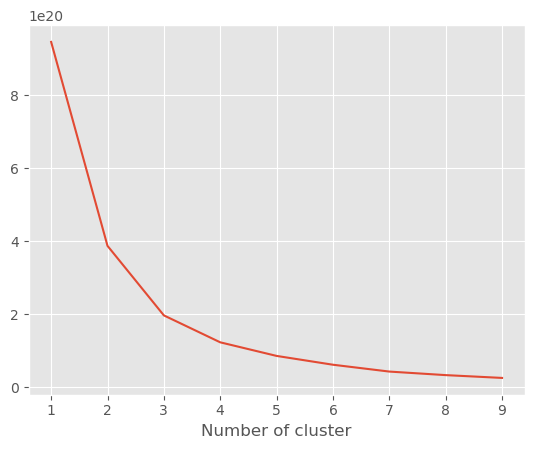

In [102]:
from sklearn.cluster import KMeans

sse={}
Overall_index = df_farm[['env_index','man_index','inc_index','ass_index']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(Overall_index)
    Overall_index["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [103]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_farm[['env_index','man_index','inc_index','ass_index']])
df_farm['OverallCluster'] = kmeans.predict(df_farm[['env_index','man_index','inc_index','ass_index']])




c:\Users\abdel\anaconda3\envs\abtest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
tx_graph = df_farm.query("'inc_index'<= 1000000 & 'man_index' <= 0.9")
xaxis = 'inc_index'
yaxis = 'man_index'

plot_data = [
    go.Scatter(
        x=tx_graph.query("OverallCluster == 0")[xaxis],
        y=tx_graph.query("OverallCluster == 0")[yaxis],
        mode='markers',
        name='Risky',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
        go.Scatter(
        x=tx_graph.query("OverallCluster == 1")[xaxis],
        y=tx_graph.query("OverallCluster == 1")[yaxis],
        mode='markers',
        name='Good',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("OverallCluster == 2")[xaxis],
        y=tx_graph.query("OverallCluster == 2")[yaxis],
        mode='markers',
        name='Excellent',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("OverallCluster == 4")[xaxis],
        y=tx_graph.query("OverallCluster == 4")[yaxis],
        mode='markers',
        name='Excellent',
        marker= dict(size= 15,
            line= dict(width=1),
            color= 'black',
            opacity= 0.5
           )
    ),]

plot_layout = go.Layout(
        yaxis= {'title': yaxis},
        xaxis= {'title': xaxis},
        title='Classes'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)